In [135]:
print('start')

import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as cs
from nltk.corpus import stopwords



import requests
from bs4 import BeautifulSoup 


from random import uniform
from time import sleep

import datetime as dt

print('done')

start
done


# Data Collection and Processing

## Data Collection

### Press Data

In [31]:
print('start')

URL = 'https://www.presidency.ucsb.edu/'

request_params = {
    'person2': '200288',
    'category2[]': '12',
    'items_per_page': '100'}
fdr_press_date =[]
fdr_press_link=[]

pres_response = requests.get(url=URL + 'advanced-search/',
                                   params=request_params)

pres_html = pres_response.text
parsed = BeautifulSoup(pres_html, 'html.parser')
d = parsed.find('li', {'class':'pager-last'})
for link in d.findAll('a'):
    NUMPAGES = int(link.get('href')[-1])
    #range(0, NUMPAGES +1 )

for page in range(0, NUMPAGES+1):
    request_params.update({'page': str(page)})
    pres_response = requests.get(url=URL + 'advanced-search/', params=request_params)
    pres_html = pres_response.text
    parsed = BeautifulSoup(pres_html, 'html.parser')
    a = parsed.find('table', {'class':'views-table sticky-enabled cols-3 table table-striped table-0 table-0 table-0'})
    b=a.find_all('td', {'class': 'views-field views-field-field-docs-start-date-time-value text-nowrap'})
    check=0
    for i in b:
        fdr_press_date.append(i.get_text().replace('\n',''))


    for link in a.findAll('a'):
        if link.get('href').startswith('/documents'):
            fdr_press_link.append(link.get('href'))
            

fdr_press_text=[]
URL = 'https://www.presidency.ucsb.edu/'

for i in fdr_press_link:
    pres_response = requests.get(url=URL + i)
    pres_html = pres_response.text
    parsed = BeautifulSoup(pres_html, 'html.parser')
    a = parsed.find('div', {'class':'field-docs-content'}).get_text()
    fdr_press_text.append(a)

print('done')




start
done


### Policy Data

In [32]:
print('start')

URL = 'https://www.presidency.ucsb.edu/'

request_params = {
    'person2': '200288',
    'category2[]': ['84','58','45'],
    'items_per_page': '100'}
fdr_policy_date =[]
fdr_policy_link=[]

pres_response = requests.get(url=URL + 'advanced-search/',
                                   params=request_params)

pres_html = pres_response.text
parsed = BeautifulSoup(pres_html, 'html.parser')
d = parsed.find('li', {'class':'pager-last'})
for link in d.findAll('a'):
    NUMPAGES = int(link.get('href')[-1])
    #range(0, NUMPAGES +1 )

for page in range(0, NUMPAGES+1):
    request_params.update({'page': str(page)})
    pres_response = requests.get(url=URL + 'advanced-search/', params=request_params)
    pres_html = pres_response.text
    parsed = BeautifulSoup(pres_html, 'html.parser')
    a = parsed.find('table', {'class':'views-table sticky-enabled cols-3 table table-striped table-0 table-0 table-0'})
    b=a.find_all('td', {'class': 'views-field views-field-field-docs-start-date-time-value text-nowrap'})
    check=0
    for i in b:
        fdr_policy_date.append(i.get_text().replace('\n',''))


    for link in a.findAll('a'):
        if link.get('href').startswith('/documents'):
            fdr_policy_link.append(link.get('href'))

fdr_policy_text=[]
URL = 'https://www.presidency.ucsb.edu/'

for i in fdr_policy_link:
    pres_response = requests.get(url=URL + i)
    pres_html = pres_response.text
    parsed = BeautifulSoup(pres_html, 'html.parser')
    a = parsed.find('div', {'class':'field-docs-content'}).get_text()
    fdr_policy_text.append(a)
    

print('done')



start
done


### Public Data

In [33]:
print('start')

URL = 'https://www.presidency.ucsb.edu/'

request_params = {
    'person2': '200288',
    'category2[]': ['46','53'],
    'items_per_page': '100'}
fdr_public_date =[]
fdr_public_link=[]

pres_response = requests.get(url=URL + 'advanced-search/',
                                   params=request_params)

pres_html = pres_response.text
parsed = BeautifulSoup(pres_html, 'html.parser')
d = parsed.find('li', {'class':'pager-last'})
#for link in d.findAll('a'):
 #   NUMPAGES = int(link.get('href')[-1])
    #range(0, NUMPAGES +1 )

for page in range(0, 1):
    request_params.update({'page': str(page)})
    pres_response = requests.get(url=URL + 'advanced-search/', params=request_params)
    pres_html = pres_response.text
    parsed = BeautifulSoup(pres_html, 'html.parser')
    a = parsed.find('table', {'class':'views-table sticky-enabled cols-3 table table-striped table-0 table-0 table-0'})
    b=a.find_all('td', {'class': 'views-field views-field-field-docs-start-date-time-value text-nowrap'})
    check=0
    for i in b:
        fdr_public_date.append(i.get_text().replace('\n',''))


    for link in a.findAll('a'):
        if link.get('href').startswith('/documents'):
            fdr_public_link.append(link.get('href'))


fdr_public_text=[]
URL = 'https://www.presidency.ucsb.edu/'

for i in fdr_public_link:
    pres_response = requests.get(url=URL + i)
    pres_html = pres_response.text
    parsed = BeautifulSoup(pres_html, 'html.parser')
    a = parsed.find('div', {'class':'field-docs-content'}).get_text()
    fdr_public_text.append(a)

print('done')



start
done


### DNC Party Platform Data

In [43]:
print('start')

url_1932 = 'https://www.presidency.ucsb.edu/documents/1932-democratic-party-platform'
url_1936 = 'https://www.presidency.ucsb.edu/documents/1936-democratic-party-platform'
url_1940 = 'https://www.presidency.ucsb.edu/documents/1940-democratic-party-platform'
url_1944 = 'https://www.presidency.ucsb.edu/documents/1944-democratic-party-platform'

dnc_urls = [url_1932, url_1936, url_1940, url_1944]
dnc_date = [FIRSTDNC, SECONDDNC, THIRDDNC, FOURTHDNC]
def dnc_to_dataframe(dnc_urls):

    dnc_text=[]


    for URL in dnc_urls:
        pres_response = requests.get(url=URL)
        pres_html = pres_response.text
        parsed = BeautifulSoup(pres_html, 'html.parser')
        a = parsed.find('div', {'class':'field-docs-content'}).get_text()
        dnc_text.append(a)
    return (pd.DataFrame({'Date':dnc_date,'Text':dnc_text, 'DNC':list(range(1,5))},index= list(range(0, len(dnc_text)))))


dnc_df = dnc_to_dataframe(dnc_urls)
print('done')

start
done


## Creating the DataFrame

In [44]:
fdr_press_indicator = np.repeat('press', len(fdr_press_link)).tolist()
fdr_policy_indicator =np.repeat('policy', len(fdr_policy_link)).tolist()
fdr_public_indicator = np.repeat('public', len(fdr_public_link)).tolist()

fdr_categories = fdr_press_indicator + fdr_policy_indicator + fdr_public_indicator

In [91]:
fdr_president_press = pd.DataFrame({'Date':fdr_press_date,'Text':fdr_press_text}, index= list(range(0, len(fdr_press_text))))
fdr_president_policy = pd.DataFrame({'Date':fdr_policy_date,'Text':fdr_policy_text}, index= list(range(0, len(fdr_policy_text))))
fdr_president_public = pd.DataFrame({'Date':fdr_public_date,'Text':fdr_public_text}, index= list(range(0, len(fdr_public_text))))
fdr_president = pd.concat([fdr_president_press,fdr_president_policy,fdr_president_public], ignore_index = True, sort = False)
fdr_president['categories'] = fdr_categories
fdr_president['Date']= pd.to_datetime(fdr_president['Date'], errors = 'coerce')
fdr_president = fdr_president.sort_values(['Date'])
fdr_president = fdr_president.reset_index(drop=True)

fdr_president['term_code'] = None
fdr_president['dnc_code'] = None
fdr_president['days_since_dnc'] = None


In [92]:
fdr_president_dnc = fdr_president.append(dnc_df, sort = False)
fdr_president_dnc = fdr_president_dnc.sort_values(['Date'])
fdr_president_dnc = fdr_president_dnc.reset_index(drop=True)

fdr_president_dnc['Year'] = pd.DatetimeIndex(fdr_president_dnc['Date']).year

In [93]:
FIRSTINAUG = dt.datetime(1933,3,4)
SECONDINAUG = dt.datetime(1937,1,20)
THIRDINAUG = dt.datetime(1941,1,20)
FOURTHINAUG = dt.datetime(1945,1,20)

for i in range(0,len(fdr_president)):
    if fdr_president.loc[i, 'Date']<FIRSTINAUG:
        fdr_president.loc[i,'term_code'] = 0
    elif FIRSTINAUG<=fdr_president.loc[i, 'Date']<SECONDINAUG:
        fdr_president.loc[i, 'term_code'] = 1
    elif SECONDINAUG<=fdr_president.loc[i, 'Date']<THIRDINAUG:
        fdr_president.loc[i, 'term_code'] = 2
    elif THIRDINAUG<=fdr_president.loc[i, 'Date']<FOURTHINAUG:
        fdr_president.loc[i, 'term_code'] = 3
    elif FOURTHINAUG<=fdr_president.loc[i,'Date']:
        fdr_president.loc[i, 'term_code'] = 4

In [94]:
FIRSTDNC = dt.datetime(1932,6,27)
SECONDDNC = dt.datetime(1936,6, 23)
THIRDDNC = dt.datetime(1940,7,15)
FOURTHDNC = dt.datetime(1944,7,19)

for i in range(0,len(fdr_president)):
    DATE = fdr_president.loc[i, 'Date']
    if DATE<FIRSTDNC:
        fdr_president.loc[i,'dnc_code'] = 0
    elif FIRSTDNC<=DATE<SECONDDNC:
        fdr_president.loc[i, 'dnc_code'] = 1
        fdr_president.loc[i,'days_since_dnc'] = DATE - FIRSTDNC
    elif SECONDDNC<=DATE<THIRDDNC:
        fdr_president.loc[i, 'dnc_code'] = 2
        fdr_president.loc[i,'days_since_dnc'] = DATE - SECONDDNC
    elif THIRDDNC<=DATE<FOURTHDNC:
        fdr_president.loc[i, 'dnc_code'] = 3
        fdr_president.loc[i,'days_since_dnc'] = DATE - THIRDDNC
    elif FOURTHDNC<=DATE:
        fdr_president.loc[i, 'dnc_code'] = 4
        fdr_president.loc[i,'days_since_dnc'] = DATE - FOURTHDNC



In [95]:
fdr_president_dnc = fdr_president.append(dnc_df, sort = False)
fdr_president_dnc = fdr_president_dnc.sort_values(['Date'])
fdr_president_dnc = fdr_president_dnc.reset_index(drop=True)

fdr_president_dnc['Year'] = pd.DatetimeIndex(fdr_president_dnc['Date']).year

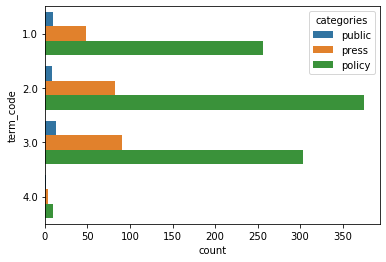

In [96]:
sns.countplot(y= 'term_code', hue = 'categories', data = fdr_president_dnc)



Text(0.5, 1.0, 'Counts per Category per Year')

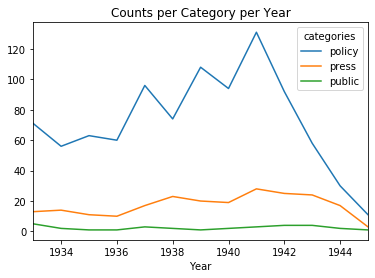

In [97]:
fdr_president_dnc.groupby(['Year']).categories.value_counts().unstack().plot()
plt.title('Counts per Category per Year')

In [104]:
cv_fit

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## ANALYSIS

In [98]:
dnc_1932_index = np.where(fdr_president_dnc.DNC==1)[0]
dnc_1936_index = np.where(fdr_president_dnc.DNC==2)[0]
dnc_1940_index = np.where(fdr_president_dnc.DNC==3)[0]
dnc_1944_index = np.where(fdr_president_dnc.DNC==4)[0]

### Performing the TF/IDF and deleting stopwords

In [99]:
cv=CountVectorizer(stop_words='english')
fdr_text_processed=[]
for i in range(0, len(fdr_president_dnc)):
    fdr_text_processed.append(fdr_president_dnc[i:i+1]['Text'].values[0].lower())
fdr_texts = [i for i in fdr_text_processed if not i in stopwords.words('english')]

cv_fit=cv.fit(fdr_texts)
freq=cv_fit.transform(fdr_texts).toarray()
length = np.apply_along_axis(np.sum, 1, freq)
norm_freq = freq / np.reshape(length, (freq.shape[0], -1))
fdr_president_tfidf=pd.DataFrame(norm_freq,columns= cv_fit.get_feature_names())

### Performing the Cosine Similarity of Each Document to the Corresponding DNC Party Platform and Returning it in the Respective Column

In [100]:
fdr_president_dnc['Similarity_Score_DNC_1932'] = pd.DataFrame(cs(fdr_president_tfidf, fdr_president_tfidf))[dnc_1932_index]
fdr_president_dnc['Similarity_Score_DNC_1936'] = pd.DataFrame(cs(fdr_president_tfidf, fdr_president_tfidf))[dnc_1936_index]
fdr_president_dnc['Similarity_Score_DNC_1940'] = pd.DataFrame(cs(fdr_president_tfidf, fdr_president_tfidf))[dnc_1940_index]
fdr_president_dnc['Similarity_Score_DNC_1944'] = pd.DataFrame(cs(fdr_president_tfidf, fdr_president_tfidf))[dnc_1944_index]


In [101]:
fdr_president_dnc['similarity_score'] = None

for i in range (0, len(fdr_president_dnc)):
    if (fdr_president_dnc.loc[i, 'dnc_code'] == 1):
        fdr_president_dnc.loc[i, 'similarity_score'] = fdr_president_dnc.loc[i, 'Similarity_Score_DNC_1932']
    elif( fdr_president_dnc.loc[i, 'dnc_code'] == 2):
        fdr_president_dnc.loc[i, 'similarity_score'] = fdr_president_dnc.loc[i, 'Similarity_Score_DNC_1936']
    elif (fdr_president_dnc.loc[i, 'dnc_code'] == 3):
        fdr_president_dnc.loc[i, 'similarity_score'] = fdr_president_dnc.loc[i, 'Similarity_Score_DNC_1940']
    elif (fdr_president_dnc.loc[i, 'dnc_code'] == 4):
        fdr_president_dnc.loc[i, 'similarity_score'] = fdr_president_dnc.loc[i, 'Similarity_Score_DNC_1944']
print('done')

done


In [102]:
fdr_president_dnc1 = fdr_president_dnc[(fdr_president_dnc['term_code']==1)]
fdr_president_dnc2 = fdr_president_dnc[(fdr_president_dnc['term_code']==2)]
fdr_president_dnc3 = fdr_president_dnc[(fdr_president_dnc['term_code']==3)]
fdr_president_dnc4 = fdr_president_dnc[(fdr_president_dnc['term_code']==4)]


In [136]:
fdr_president_dnc.similarity_score = fdr_president_dnc.similarity_score.astype(float)
fdr_president_dnc['MatPlotDates'] = dates.date2num(fdr_president_dnc['Date'])

Text(0.5, 1, 'Similarity Score as a Function of Time')

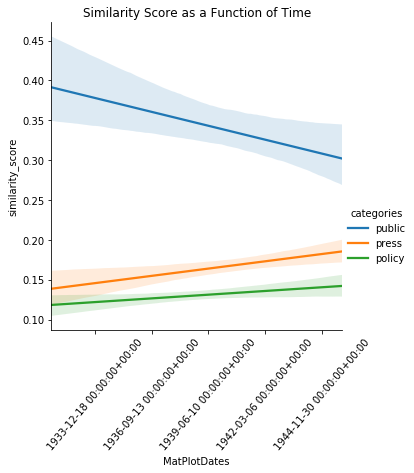

In [145]:
sns.lmplot(x='MatPlotDates', y='similarity_score', hue = 'categories',scatter = False, data = fdr_president_dnc)
ax=plt.gca()
x_axis = ax.get_xticks()
ax.set_xticklabels([dates.num2date(i) for i in x_axis],
 rotation=50)
plt.title('Similarity Score as a Function of Time')

Text(0, 0.5, 'Similarity Score')

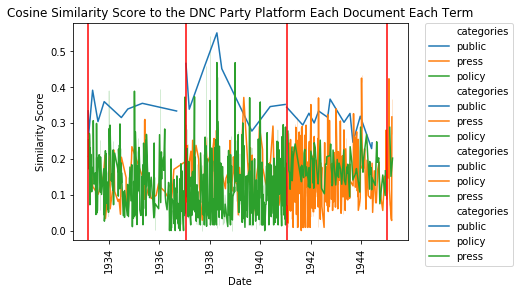

In [152]:
sns.lineplot(x='Date', y='Similarity_Score_DNC_1932', hue = 'categories', data = fdr_president_dnc1)
sns.lineplot(x='Date', y='Similarity_Score_DNC_1936', hue = 'categories', data = fdr_president_dnc2)
sns.lineplot(x='Date', y='Similarity_Score_DNC_1940', hue = 'categories', data = fdr_president_dnc3)
sns.lineplot(x='Date', y='Similarity_Score_DNC_1944', hue = 'categories', data = fdr_president_dnc4)



plt.xticks(rotation=90)

plt.title("Cosine Similarity Score to the DNC Party Platform Each Document Each Term")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.axvline(FIRSTINAUG, 0, color='r')
plt.axvline(SECONDINAUG, 0, color='r')
plt.axvline(THIRDINAUG, 0, color='r')
plt.axvline(FOURTHINAUG, 0, color='r')

plt.ylabel('Similarity Score')


In [170]:
fdr_president_dnc.to_csv('fdr_president_dnc.csv')

# VALIDATION

In [154]:
print('start')

url_2000 = 'https://www.presidency.ucsb.edu/documents/2000-republican-party-platform'
url_2004 = 'https://www.presidency.ucsb.edu/documents/2004-republican-party-platform'
url_2008 = 'https://www.presidency.ucsb.edu/documents/2008-republican-party-platform'
url_2012 = 'https://www.presidency.ucsb.edu/documents/2012-republican-party-platform'

rnc_urls = [url_2000, url_2004, url_2008, url_2012]
rnc_date = [dt.datetime(2000,7,31), dt.datetime(2004,8,30), dt.datetime(2008,9,1), dt.datetime(2012,8,27)]

def rnc_to_dataframe(rnc_urls):

    rnc_text=[]


    for URL in rnc_urls:
        pres_response = requests.get(url=URL)
        pres_html = pres_response.text
        parsed = BeautifulSoup(pres_html, 'html.parser')
        a = parsed.find('div', {'class':'field-docs-content'}).get_text()
        rnc_text.append(a)
    return (pd.DataFrame({'Date':rnc_date,'Text':rnc_text, 'RNC':list(range(1,5))},index= list(range(0, len(dnc_text)))))


rnc_df = rnc_to_dataframe(rnc_urls)

fdr_validation= fdr_president_dnc.append(rnc_df, sort = False)
fdr_validation = fdr_validation.sort_values(['Date'])
fdr_validation = fdr_validation.reset_index(drop=True)
print('done')

start
done


In [155]:
cv=CountVectorizer(stop_words='english')
fdr_text_processed=[]
for i in range(0, len(fdr_validation)):
    fdr_text_processed.append(fdr_validation[i:i+1]['Text'].values[0].lower())
fdr_texts = [i for i in fdr_text_processed if not i in stopwords.words('english')]

cv_fit=cv.fit(fdr_texts)
freq=cv_fit.transform(fdr_texts).toarray()
length = np.apply_along_axis(np.sum, 1, freq)
norm_freq = freq / np.reshape(length, (freq.shape[0], -1))
fdr_validation_tfidf=pd.DataFrame(norm_freq,columns= cv_fit.get_feature_names())

In [156]:
rnc_2000_index = np.where(fdr_validation.RNC==1)[0]
rnc_2004_index = np.where(fdr_validation.RNC==2)[0]
rnc_2008_index = np.where(fdr_validation.RNC==3)[0]
rnc_2012_index = np.where(fdr_validation.RNC==4)[0]


fdr_validation['Similarity_Score_RNC_2000'] = pd.DataFrame(cs(fdr_validation_tfidf, fdr_validation_tfidf))[rnc_2000_index]
fdr_validation['Similarity_Score_RNC_2004'] = pd.DataFrame(cs(fdr_validation_tfidf, fdr_validation_tfidf))[rnc_2004_index]
fdr_validation['Similarity_Score_RNC_2008'] = pd.DataFrame(cs(fdr_validation_tfidf, fdr_validation_tfidf))[rnc_2008_index]
fdr_validation['Similarity_Score_RNC_2012'] = pd.DataFrame(cs(fdr_validation_tfidf, fdr_validation_tfidf))[rnc_2012_index]



In [158]:
fdr_validation['similarity_score'] = None

for i in range (0, len(fdr_validation)):
    if (fdr_validation.loc[i, 'dnc_code'] == 1):
        fdr_validation.loc[i, 'similarity_score'] = fdr_validation.loc[i, 'Similarity_Score_DNC_1932']
    elif( fdr_validation.loc[i, 'dnc_code'] == 2):
        fdr_validation.loc[i, 'similarity_score'] = fdr_validation.loc[i, 'Similarity_Score_DNC_1936']
    elif (fdr_validation.loc[i, 'dnc_code'] == 3):
        fdr_validation.loc[i, 'similarity_score'] = fdr_validation.loc[i, 'Similarity_Score_DNC_1940']
    elif (fdr_validation.loc[i, 'dnc_code'] == 4):
        fdr_validation.loc[i, 'similarity_score'] = fdr_validation.loc[i, 'Similarity_Score_DNC_1944']
print('done')

done


In [163]:
fdr_validation ['validation'] = None
for i in range (0, len(fdr_validation)):
    if (fdr_validation.loc[i,'similarity_score'] != None):
        if (fdr_validation.loc[i,'similarity_score']> ((fdr_validation.loc[i,'Similarity_Score_RNC_2000']+fdr_validation.loc[i,'Similarity_Score_RNC_2004']+fdr_validation.loc[i,'Similarity_Score_RNC_2008'] + fdr_validation.loc[i,'Similarity_Score_RNC_2012'])/4)):
            fdr_validation.loc[i,'validation']=1
        else:
            fdr_validation.loc[i,'validation']=0

print('done')



done


In [161]:
fdr_validation ['validation'] = None
for i in range (0, len(fdr_validation)):
    if (fdr_validation.loc[i,'similarity_score'] != None):
        if (((fdr_validation.loc[i,'Similarity_Score_DNC_1936']+fdr_validation.loc[i,'Similarity_Score_DNC_1932']+fdr_validation.loc[i,'Similarity_Score_DNC_1940'] + fdr_validation.loc[i,'Similarity_Score_DNC_1944'])/4)> ((fdr_validation.loc[i,'Similarity_Score_RNC_2000']+fdr_validation.loc[i,'Similarity_Score_RNC_2004']+fdr_validation.loc[i,'Similarity_Score_RNC_2008'] + fdr_validation.loc[i,'Similarity_Score_RNC_2012'])/4)):
            fdr_validation.loc[i,'validation']=1
        else:
            fdr_validation.loc[i,'validation']=0

print('done')


done


In [167]:
fdr_validation.validation.value_counts()[1]/fdr_validation.validation.value_counts()[0]


0.46219512195121953